
# IMPORT MODULES

In [66]:
import pandas as pd
import numpy as np

# LOAD DATASET - simple variale

In [38]:
df = pd.read_csv("./data/train.csv")
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [67]:
X = df["x"].values.reshape(-1,1)
y = df["y"].values

# BUILD MODEL

In [68]:
import warnings
warnings.filterwarnings(action='ignore')

In [69]:
import linear_model
import imp
imp.reload(linear_model)

<module 'linear_model' from 'c:\\workspace\\TIL\\ML\\Linear_Regression\\lab_Gradient_Descent\\linear_model.py'>

In [70]:
lr = linear_model.LinearRegressionGD(eta0=0.0001, epochs=500000, weight_decay=1)

In [71]:
lr.fit(X, y)

In [72]:
lr.intercept

-0.12015149492508964

In [73]:
lr.coef

array([1.00077819])

In [74]:
lr.predict(X)[:10]

array([23.89852501, 49.91875788, 14.89152132, 37.90941963, 86.94755082,
       35.90786326, 11.88918676, 80.9428817 , 24.89930319,  4.88373944])

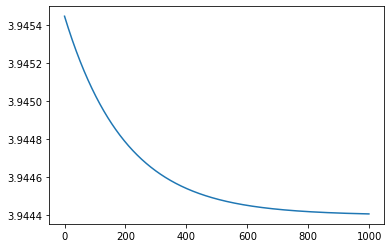

In [75]:
import matplotlib.pyplot as plt
plt.plot(lr.cost_history[1000:2000])
plt.show()

# VALIDATION

In [76]:
from sklearn import linear_model
sk_lr = linear_model.LinearRegression(normalize=False)
sk_lr.fit(X, y)

LinearRegression(normalize=False)

In [77]:
sk_lr.intercept_

-0.12015553181320371

In [78]:
sk_lr.coef_

array([1.00077825])

In [79]:
np.isclose(lr.coef, sk_lr.coef_)

array([ True])

In [80]:
sk_lr.predict(X)[:10]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205,
       35.9078614 , 11.88918345, 80.94288256, 24.89930067,  4.88373571])

In [82]:
df_test = pd.read_csv("./data/test.csv")
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [83]:
X_test = df["x"].values.reshape(-1,1)

In [84]:
lr.predict(X_test)[:5]

array([23.89852501, 49.91875788, 14.89152132, 37.90941963, 86.94755082])

In [85]:
sk_lr.predict(X_test)[:5]

array([23.89852242, 49.91875687, 14.89151819, 37.9094179 , 86.94755205])

# LOAD DATASET - multiple variables

In [86]:
df = pd.read_csv("./data/mlr09.csv")
df.head()

,height_in_feet,weight_in_pounds,successful_field_goals,percent_of_successful_free_throws,average_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [87]:
y = df["average_points_scored"].values

In [88]:
df.iloc[:,:-1].head()

,height_in_feet,weight_in_pounds,successful_field_goals,percent_of_successful_free_throws
0,6.8,225,0.442,0.672
1,6.3,180,0.435,0.797
2,6.4,190,0.456,0.761
3,6.2,180,0.416,0.651
4,6.9,205,0.449,0.900


In [89]:
X = df.iloc[:,:-1].values

In [90]:
X[:5]

array([[  6.8  , 225.   ,   0.442,   0.672],
       [  6.3  , 180.   ,   0.435,   0.797],
       [  6.4  , 190.   ,   0.456,   0.761],
       [  6.2  , 180.   ,   0.416,   0.651],
       [  6.9  , 205.   ,   0.449,   0.9  ]])

# RESCALED

In [91]:
mu_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

rescaled_X = (X - mu_X) / std_X

In [92]:
rescaled_X[:5]

array([[ 0.46843663,  0.50336336, -0.12692668, -0.70404955],
       [-0.63137111, -0.99746237, -0.25187012,  0.55584824],
       [-0.41140956, -0.66394554,  0.12296022,  0.19299768],
       [-0.85133266, -0.99746237, -0.59100234, -0.91571238],
       [ 0.68839818, -0.1636703 , -0.00198323,  1.59400403]])

# VALIDATION

In [93]:
lr.fit(rescaled_X, y)

In [94]:
lr.coef

array([-1.6775572 ,  0.28335005,  2.68587916,  1.12815625])

In [95]:
lr.intercept

11.79074074073186

In [96]:
sk_lr.fit(rescaled_X, y)

LinearRegression(normalize=False)

In [97]:
sk_lr.coef_

array([-1.67779283,  0.28359762,  2.68586629,  1.12816882])

In [98]:
sk_lr.intercept_

11.790740740740736